# GROUP 144 IMDB Analysis & Model Building
### R.B. KHARE_BITS ID: 2020FC04857
### ANURAG_BITS ID: 2020FA04028
### ABHINAV CHANDRAVANSHI_BITS ID:2020FC04860

**Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Loading** **dataset**

In [2]:
Name = pd.read_csv('name_basics.csv')
Basics = pd.read_csv('title_basics.csv')
Crew = pd.read_csv('title_crew.csv')
Episode = pd.read_csv('title_episode.csv')
Principals = pd.read_csv('title_principals.csv')
Ratings = pd.read_csv('title_ratings.csv')

In [3]:
Akas = pd.read_table('title.akas.tsv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
Name.columns

Index(['Unnamed: 0', 'nconst', 'primaryName', 'birthYear', 'deathYear',
       'primaryProfession', 'knownForTitles'],
      dtype='object')

In [5]:
Basics.columns

Index(['Unnamed: 0', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres'],
      dtype='object')

In [6]:
Crew.columns

Index(['Unnamed: 0', 'tconst', 'directors', 'writers'], dtype='object')

In [7]:
Episode.columns

Index(['Unnamed: 0', 'tconst', 'parentTconst', 'seasonNumber',
       'episodeNumber'],
      dtype='object')

In [8]:
Principals.columns

Index(['Unnamed: 0', 'tconst', 'ordering', 'nconst', 'category', 'job',
       'characters'],
      dtype='object')

In [9]:
Ratings.columns

Index(['Unnamed: 0', 'tconst', 'averageRating', 'numVotes'], dtype='object')

**Printing first 5 rows for Sanity check**

In [10]:
Name.head()

,Unnamed: 0,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,0,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0117057,tt0038355,tt0071877,tt0037382"
1,1,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0054452,tt0057345,tt0049189,tt0056404"
2,2,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0077975,tt0080455,tt0072562"
3,3,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0050986,tt0050976,tt0083922,tt0060827"
4,4,nm0000006,Ingrid Bergman,1915,1982,"actress,soundtrack,producer","tt0077711,tt0034583,tt0036855,tt0038109"


In [11]:
Basics.head()

,Unnamed: 0,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0,1903,\N,6,"Action,Short"
1,1,tt0000498,short,Rescued by Rover,Rescued by Rover,0,1905,\N,7,"Crime,Drama,Family"
2,2,tt0000746,short,The Reckoning,The Reckoning,0,1908,\N,8,"Drama,Short"
3,3,tt0000843,short,The Death Disc: A Story of the Cromwellian Period,The Death Disc: A Story of the Cromwellian Period,0,1909,\N,11,"Drama,Short"
4,4,tt0001546,short,Cinderella,Cinderella,0,1912,\N,\N,"Fantasy,Romance,Short"


In [12]:
Crew.head()

,Unnamed: 0,tconst,directors,writers
0,0,tt0000447,"nm0692105,nm2092030",nm0692105
1,1,tt0000498,"nm0378408,nm0280432",nm1539443
2,2,tt0000746,nm0000428,"nm0150432,nm0191885,nm0000428,nm0940488"
3,3,tt0000843,nm0000428,"nm0878494,nm0940488"
4,4,tt0001546,nm0132324,"nm0132324,nm0342278,nm0342303,nm0916906"


In [13]:
Episode.head()

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber
0,0,tt0041951,tt0041038,1,9
1,1,tt0042816,tt0989125,1,17
2,2,tt0042889,tt0989125,\N,\N
3,3,tt0043426,tt0040051,3,42
4,4,tt0043631,tt0989125,2,16


In [14]:
Principals.head()

,Unnamed: 0,tconst,ordering,nconst,category,job,characters
0,0,tt0000229,3,nm0595213,composer,\N,\N
1,1,tt0000417,8,nm0324073,composer,\N,\N
2,2,tt0000447,1,nm0692105,actor,\N,"[""Policeman""]"
3,3,tt0000447,2,nm0891119,actress,\N,"[""The Girl""]"
4,4,tt0000447,3,nm0924475,actor,\N,"[""The Fireman""]"


In [15]:
Ratings.head()

,Unnamed: 0,tconst,averageRating,numVotes
0,0,tt0000447,6.4,2193
1,1,tt0000498,6.6,1093
2,2,tt0000746,7.4,9
3,3,tt0000843,5.7,10
4,4,tt0001790,6.0,18


**Description and shape of all data frames**

In [16]:
Name.describe()

,Unnamed: 0,birthYear
count,414246.000000,414246.000000
mean,207122.500000,1957.571033
std,119582.664142,25.712262
min,0.000000,1901.000000
25%,103561.250000,1938.000000
50%,207122.500000,1962.000000
75%,310683.750000,1979.000000
max,414245.000000,2021.000000


In [17]:
Basics.describe()

,Unnamed: 0,isAdult
count,445627.000000,445627.000000
mean,222813.000000,0.049057
std,128641.578542,0.215987
min,0.000000,0.000000
25%,111406.500000,0.000000
50%,222813.000000,0.000000
75%,334219.500000,0.000000
max,445626.000000,1.000000


In [18]:
Crew.describe()

,Unnamed: 0
count,445645.000000
mean,222822.000000
std,128646.774694
min,0.000000
25%,111411.000000
50%,222822.000000
75%,334233.000000
max,445644.000000


In [19]:
Episode.describe()

,Unnamed: 0
count,3.907607e+06
mean,1.953803e+06
std,1.128029e+06
min,0.000000e+00
25%,9.769015e+05
50%,1.953803e+06
75%,2.930704e+06
max,3.907606e+06


In [20]:
Principals.describe()

,Unnamed: 0,ordering
count,1.764517e+07,1.764517e+07
mean,8.822583e+06,4.237858e+00
std,5.093721e+06,2.787956e+00
min,0.000000e+00,1.000000e+00
25%,4.411292e+06,2.000000e+00
50%,8.822583e+06,4.000000e+00
75%,1.323387e+07,6.000000e+00
max,1.764517e+07,1.000000e+01


In [21]:
Ratings.describe()

,Unnamed: 0,averageRating,numVotes
count,262629.000000,262629.000000,2.626290e+05
mean,131314.000000,6.424002,3.760772e+03
std,75814.606261,1.394512,3.375762e+04
min,0.000000,1.000000,5.000000e+00
25%,65657.000000,5.600000,1.500000e+01
50%,131314.000000,6.600000,5.700000e+01
75%,196971.000000,7.400000,3.430000e+02
max,262628.000000,10.000000,2.407288e+06


In [22]:
Name.shape

(414246, 7)

In [23]:
Basics.shape

(445627, 10)

In [24]:
Crew.shape

(445645, 4)

In [25]:
Episode.shape

(3907607, 5)

In [26]:
Principals.shape

(17645167, 7)

In [27]:
Ratings.shape

(262629, 4)

**Visualization for insights into the data sets.**

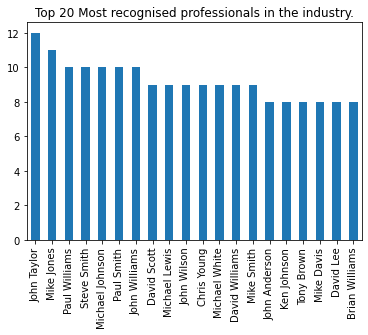

In [28]:
Name['primaryName'].value_counts()[0:20].plot(kind = 'bar')
plt.title("Top 20 Most recognised professionals in the industry.")
plt.show()

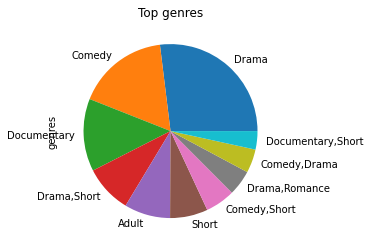

In [29]:
Basics[Basics.genres!='\\N']['genres'].value_counts()[0:10].plot(kind = 'pie')
plt.title("Top genres")
plt.show()

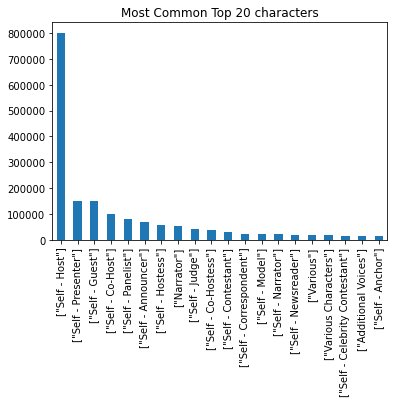

In [30]:
Principals[Principals.characters!='\\N']['characters'].value_counts()[1:21].explode().plot(kind = 'bar')
plt.title("Most Common Top 20 characters")
plt.show()

# **Data Insights**

In [31]:
# How title length affects ratings.
TitleLengthXRatings = pd.merge(Basics,Ratings,on='tconst',how = 'outer')
TitleLengthXRatings.head()

,Unnamed: 0_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,Unnamed: 0_y,averageRating,numVotes
0,0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0,1903,\N,6,"Action,Short",0.0,6.4,2193.0
1,1,tt0000498,short,Rescued by Rover,Rescued by Rover,0,1905,\N,7,"Crime,Drama,Family",1.0,6.6,1093.0
2,2,tt0000746,short,The Reckoning,The Reckoning,0,1908,\N,8,"Drama,Short",2.0,7.4,9.0
3,3,tt0000843,short,The Death Disc: A Story of the Cromwellian Period,The Death Disc: A Story of the Cromwellian Period,0,1909,\N,11,"Drama,Short",3.0,5.7,10.0
4,4,tt0001546,short,Cinderella,Cinderella,0,1912,\N,\N,"Fantasy,Romance,Short",NaN,NaN,NaN


In [32]:
for i in range(len(TitleLengthXRatings)):
  TitleLengthXRatings.at[i,'Title length'] = len(TitleLengthXRatings.loc[i,'originalTitle'])


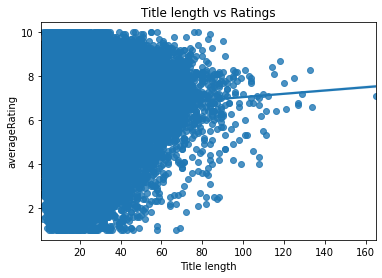

In [33]:
sns.regplot(x = 'Title length',y = 'averageRating',data = TitleLengthXRatings)
plt.title("Title length vs Ratings")
plt.show()

In [34]:
TitleLengthXRatings[['Title length','averageRating']].corr()

,Title length,averageRating
Title length,1.000000,0.052517
averageRating,0.052517,1.000000


There is no significant relationship between Title length and average rating of a movie.


# **Explore best writers and directors with higher ratings.**

In [35]:
Tconst = list(Ratings.sort_values(by=['averageRating','numVotes'],ascending=False)[:20]['tconst'])
Tconst

['tt13904784',
 'tt14749180',
 'tt0866639',
 'tt13223848',
 'tt1787052',
 'tt13352136',
 'tt13352176',
 'tt13411228',
 'tt1787053',
 'tt11729018',
 'tt5783558',
 'tt1085701',
 'tt12774216',
 'tt4327728',
 'tt2646104',
 'tt0140082',
 'tt14391292',
 'tt0270900',
 'tt0333372',
 'tt0448633']

In [36]:
Rows = []
for i in Tconst:
  Rows = Rows + list(np.where(Crew['tconst']==i)[0])

In [37]:
TopWD = Crew.loc[Rows,:]

In [38]:
TopWD = pd.concat([TopWD.drop('directors',axis = 1),TopWD['directors'].str.get_dummies(sep=',')],1)
TopWD

,Unnamed: 0,tconst,writers,nm0030365,nm0104172,nm0203712,nm0285998,nm0357553,nm0406114,nm0411958,...,nm1869577,nm2448669,nm3361196,nm3753506,nm3762653,nm4492923,nm5371165,nm7030385,nm7031415,nm8195164
249882,249882,tt13904784,\N,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261659,261659,tt14749180,nm10656343,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182419,182419,tt0866639,"nm0100862,nm0161427,nm0176990,nm0352555,nm0658...",1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
239290,239290,tt13223848,nm5371165,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
283483,283483,tt1787052,\N,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
241307,241307,tt13352136,"nm3361196,nm5410176",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
241309,241309,tt13352176,nm3361196,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
242331,242331,tt13411228,"nm3361196,nm12041639",0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
283484,283484,tt1787053,\N,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
217401,217401,tt11729018,nm3762653,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [39]:
DirectorNames = list(TopWD.columns[3:].unique())
DirectorNames

['nm0030365',
 'nm0104172',
 'nm0203712',
 'nm0285998',
 'nm0357553',
 'nm0406114',
 'nm0411958',
 'nm0495361',
 'nm0643945',
 'nm0820078',
 'nm10656343',
 'nm12259114',
 'nm1250733',
 'nm1856752',
 'nm1869577',
 'nm2448669',
 'nm3361196',
 'nm3753506',
 'nm3762653',
 'nm4492923',
 'nm5371165',
 'nm7030385',
 'nm7031415',
 'nm8195164']

In [40]:
TopWD = TopWD.iloc[:,:3]
TopWD

,Unnamed: 0,tconst,writers
249882,249882,tt13904784,\N
261659,261659,tt14749180,nm10656343
182419,182419,tt0866639,"nm0100862,nm0161427,nm0176990,nm0352555,nm0658..."
239290,239290,tt13223848,nm5371165
283483,283483,tt1787052,\N
241307,241307,tt13352136,"nm3361196,nm5410176"
241309,241309,tt13352176,nm3361196
242331,242331,tt13411228,"nm3361196,nm12041639"
283484,283484,tt1787053,\N
217401,217401,tt11729018,nm3762653


In [41]:
TopWD = pd.concat([TopWD.drop('writers',axis = 1),TopWD['writers'].str.get_dummies(sep=',')],1)
TopWD.drop('\\N',inplace = True,axis = 1)
TopWD

,Unnamed: 0,tconst,nm0100862,nm0161427,nm0176990,nm0352555,nm0357553,nm0499714,nm0658388,nm0687090,...,nm1860671,nm1869577,nm2183430,nm3361196,nm3762653,nm4492923,nm5371165,nm5410176,nm5870567,nm8195164
249882,249882,tt13904784,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261659,261659,tt14749180,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
182419,182419,tt0866639,1,1,1,1,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
239290,239290,tt13223848,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
283483,283483,tt1787052,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
241307,241307,tt13352136,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
241309,241309,tt13352176,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
242331,242331,tt13411228,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
283484,283484,tt1787053,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217401,217401,tt11729018,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [42]:
WriterNames = list(TopWD.columns[2:].unique())
WriterNames

['nm0100862',
 'nm0161427',
 'nm0176990',
 'nm0352555',
 'nm0357553',
 'nm0499714',
 'nm0658388',
 'nm0687090',
 'nm0957008',
 'nm10656343',
 'nm12041639',
 'nm12459725',
 'nm1283207',
 'nm1283208',
 'nm1860671',
 'nm1869577',
 'nm2183430',
 'nm3361196',
 'nm3762653',
 'nm4492923',
 'nm5371165',
 'nm5410176',
 'nm5870567',
 'nm8195164']

In [43]:
DRows = []
for i in DirectorNames:
  DRows = DRows + list(np.where(Name['nconst']==i)[0])
TopRatingD = Name.loc[DRows,'primaryName']
TopRatingD

8924          Paul Annett
55326         Ian Fordyce
67640         Peter Hamel
77625       Branko Ivanda
93490          Don Leaver
118883           Erik Ode
260416       Udo Langhoff
333884    Daniele Gangemi
344765         Sam Felman
358190     Leonardo Thimo
398585      Ioannis Makro
Name: primaryName, dtype: object

##**Directors with Highest Ratings**

In [44]:
TopRatingD

8924          Paul Annett
55326         Ian Fordyce
67640         Peter Hamel
77625       Branko Ivanda
93490          Don Leaver
118883           Erik Ode
260416       Udo Langhoff
333884    Daniele Gangemi
344765         Sam Felman
358190     Leonardo Thimo
398585      Ioannis Makro
Name: primaryName, dtype: object

## **Writer with Highest Ratings**

In [45]:
WRows = []
for i in WriterNames:
  WRows = WRows + list(np.where(Name['nconst']==i)[0])
TopRatingW = Name.loc[WRows,'primaryName']
TopRatingW

22531           John Bowen
33401     Donald Churchill
36039           David Cook
66742         Alan Hackney
67640          Peter Hamel
94187          Leo Lehmann
121462     Nicholas Palmer
210990     Josephs Quartzy
280542    Reinhard Raffalt
333884     Daniele Gangemi
344765          Sam Felman
358190      Leonardo Thimo
376614     Anestis Dalezis
398585       Ioannis Makro
Name: primaryName, dtype: object

## Merged Data Frame Using 7 Datasets


In [46]:
MainData = pd.merge(Basics,Crew,on ='tconst',how = 'outer')

In [47]:
MainData = pd.merge(MainData,Episode,on ='tconst',how = 'outer')

In [48]:
MainData = pd.merge(MainData,Principals,on ='tconst',how = 'outer')

In [49]:
MainData = pd.merge(MainData,Ratings,on ='tconst',how = 'outer')

In [50]:
temp = Akas[Akas['isOriginalTitle'] == 1]
temp.columns= ['tconst', 'ordering', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle']
temp.head()

,tconst,ordering,title,region,language,types,attributes,isOriginalTitle
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
21,tt0000003,6,Pauvre Pierrot,\N,\N,original,\N,1
25,tt0000004,1,Un bon bock,\N,\N,original,\N,1
33,tt0000005,10,Blacksmith Scene,\N,\N,original,\N,1


In [51]:
Akas.head(20)

,titleId,ordering,title,region,language,types,attributes,isOriginalTitle
0,tt0000001,1,Карменсіта,UA,\N,imdbDisplay,\N,0
1,tt0000001,2,Carmencita,DE,\N,\N,literal title,0
2,tt0000001,3,Carmencita - spanyol tánc,HU,\N,imdbDisplay,\N,0
3,tt0000001,4,Καρμενσίτα,GR,\N,imdbDisplay,\N,0
4,tt0000001,5,Карменсита,RU,\N,imdbDisplay,\N,0
5,tt0000001,6,Carmencita,US,\N,imdbDisplay,\N,0
6,tt0000001,7,Carmencita,\N,\N,original,\N,1
7,tt0000001,8,カルメンチータ,JP,ja,imdbDisplay,\N,0
8,tt0000002,1,Le clown et ses chiens,\N,\N,original,\N,1
9,tt0000002,2,Le clown et ses chiens,FR,\N,imdbDisplay,\N,0


In [52]:
MainData = pd.merge(MainData,temp,on ='tconst',how = 'outer')

In [53]:
MainData.head()

,Unnamed: 0_x,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,...,Unnamed: 0,averageRating,numVotes,ordering_y,title,region,language,types,attributes,isOriginalTitle
0,0.0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0.0,1903,\N,6,"Action,Short",...,0.0,6.4,2193.0,7.0,Life of an American Fireman,\N,\N,original,\N,1
1,0.0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0.0,1903,\N,6,"Action,Short",...,0.0,6.4,2193.0,7.0,Life of an American Fireman,\N,\N,original,\N,1
2,0.0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0.0,1903,\N,6,"Action,Short",...,0.0,6.4,2193.0,7.0,Life of an American Fireman,\N,\N,original,\N,1
3,0.0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0.0,1903,\N,6,"Action,Short",...,0.0,6.4,2193.0,7.0,Life of an American Fireman,\N,\N,original,\N,1
4,0.0,tt0000447,short,Life of an American Fireman,Life of an American Fireman,0.0,1903,\N,6,"Action,Short",...,0.0,6.4,2193.0,7.0,Life of an American Fireman,\N,\N,original,\N,1


In [54]:
MainData.dropna(axis = 0,subset=['averageRating','numVotes'],inplace=
                True)

In [55]:
MainData.reset_index(drop = True,inplace=True)

In [56]:
MainData.shape

(2407497, 33)

In [57]:
TitleLengthXYears = pd.merge(Basics[['tconst','startYear']],TitleLengthXRatings,on='tconst',how='outer')

In [58]:
TitleLengthXYears = TitleLengthXYears.groupby('startYear_y').mean()
TitleLengthXYears = TitleLengthXYears.iloc[0:125,:]


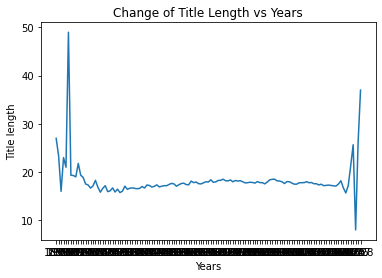

In [59]:
sns.lineplot(x = TitleLengthXYears.index,y='Title length',data=TitleLengthXYears)
plt.title("Change of Title Length vs Years")
plt.xlabel('Years')
plt.show()

In [60]:
GenreRating = MainData.groupby('genres').mean()
GenreRating = GenreRating.sort_values(by='averageRating',ascending=False)

In [61]:
GenreRating = GenreRating.iloc[0:10,:]
GenreRating

,Unnamed: 0_x,isAdult,Unnamed: 0_y,Unnamed: 0_x,Unnamed: 0_y,ordering_x,Unnamed: 0,averageRating,numVotes,ordering_y
genres,,,,,,,,,,
"Biography,Comedy,Sport",229019.0,0.0,229019.0,NaN,7056169.5,5.5,162341.0,9.8,22.0,NaN
"Adventure,Reality-TV,Talk-Show",294403.0,0.0,294421.0,NaN,10318390.5,5.5,192065.0,9.7,10.0,NaN
"Comedy,Documentary,Fantasy",355094.0,0.0,355112.0,NaN,12599175.5,2.5,223872.0,9.4,5.0,NaN
"Game-Show,History,Music",176163.0,0.0,176163.0,NaN,3742499.5,3.5,136779.0,9.0,246.0,NaN
"Biography,Fantasy,Short",362626.0,0.0,362644.0,NaN,12932922.5,4.5,227421.0,9.0,5.0,NaN
"Documentary,Fantasy,Short",144721.0,0.0,144721.0,NaN,1843665.0,3.0,116018.0,9.0,10.0,NaN
"Musical,Short,Thriller",303303.0,0.0,303321.0,NaN,10687530.0,5.0,196836.0,9.0,10.0,NaN
"History,Romance,Short",323495.5,0.0,323513.5,NaN,11404222.0,5.5,206333.0,8.9,6.5,NaN
"Documentary,Game-Show,News",109497.0,0.0,109497.0,NaN,1372349.0,2.0,91774.0,8.8,52.0,NaN


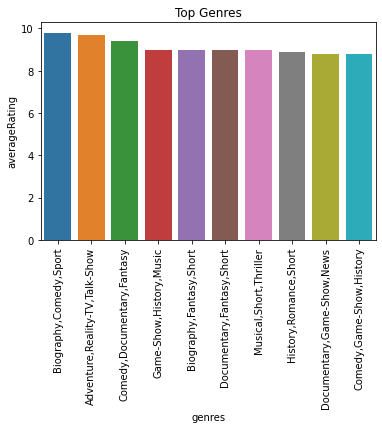

In [62]:
sns.barplot(x = GenreRating.index,y='averageRating',data = GenreRating)
plt.xticks(rotation='vertical')
plt.title('Top Genres')
plt.show()

# **Data preprocessing and cleaning**

In [63]:
MainData.columns

Index(['Unnamed: 0_x', 'tconst', 'titleType', 'primaryTitle', 'originalTitle',
       'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres',
       'Unnamed: 0_y', 'directors', 'writers', 'Unnamed: 0_x', 'parentTconst',
       'seasonNumber', 'episodeNumber', 'Unnamed: 0_y', 'ordering_x', 'nconst',
       'category', 'job', 'characters', 'Unnamed: 0', 'averageRating',
       'numVotes', 'ordering_y', 'title', 'region', 'language', 'types',
       'attributes', 'isOriginalTitle'],
      dtype='object')

In [64]:
ImpColumns = ['titleType','primaryTitle','originalTitle','isAdult','startYear','endYear','runtimeMinutes','genres','category','directors', 'writers',
              'averageRating','numVotes','title', 'region', 'language', 'types','attributes'] 

In [65]:
MainData = MainData[ImpColumns]

In [66]:
MainData.drop(['originalTitle'],inplace=True, axis=1)

In [67]:
MainData.drop(['region'],inplace=True, axis=1)

In [68]:
MainData.shape

(2407497, 16)

In [69]:
MainData = MainData.iloc[:2000,:]

In [70]:
MainData.shape

(2000, 16)

In [71]:
MainData.isna().sum()

titleType          0
primaryTitle       0
isAdult            0
startYear          0
endYear            0
runtimeMinutes     0
genres             0
category           0
directors          0
writers            0
averageRating      0
numVotes           0
title             10
language          10
types             10
attributes        10
dtype: int64

In [72]:
MainData = pd.get_dummies(MainData, drop_first=True)

In [73]:
MainData.head()

,isAdult,averageRating,numVotes,titleType_short,primaryTitle_A Daughter of the Gods,primaryTitle_A Florida Enchantment,primaryTitle_A House Divided,primaryTitle_A Little Princess,primaryTitle_A Man from Nowhere,primaryTitle_A Sister of Six,...,title_When the Earth Trembled,title_Where Are My Children?,title_Wide Open Spaces,title_Within Our Gates,title_Woman,title_Wuthering Heights,title_Yankee Doodle in Berlin,title_Young Mother Hubbard,title_Zoárd mester,title_Zudora
0,0.0,6.4,2193.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,6.4,2193.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,6.4,2193.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,6.4,2193.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,6.4,2193.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
y = MainData.pop('numVotes')
X = MainData


In [75]:
X.head()

,isAdult,averageRating,titleType_short,primaryTitle_A Daughter of the Gods,primaryTitle_A Florida Enchantment,primaryTitle_A House Divided,primaryTitle_A Little Princess,primaryTitle_A Man from Nowhere,primaryTitle_A Sister of Six,primaryTitle_A Son of David,...,title_When the Earth Trembled,title_Where Are My Children?,title_Wide Open Spaces,title_Within Our Gates,title_Woman,title_Wuthering Heights,title_Yankee Doodle in Berlin,title_Young Mother Hubbard,title_Zoárd mester,title_Zudora
0,0.0,6.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.0,6.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.0,6.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,6.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,6.4,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# **Data preprocessing and cleaning**
11. Identify null or missing values.
12. Standardization and normalization.
13. Correlation analysis.Heat map.

# **Data Preparation**
1. Do final feature selection and extract them into column X and class label into column Y.
2. Split data set into training and testing sets.
# **Model selection and building**
1. Perform model development using atleast 3 models 
2. Train the model and print training accuracy and loss values.
# **Performance evaluation**
1. Print confusion matrix and provide appropriate analysis.
2. Do the prediction for test data and display the results.



In [76]:
y.head()

0    2193.0
1    2193.0
2    2193.0
3    2193.0
4    2193.0
Name: numVotes, dtype: float64

In [77]:
#plt.figure(figsize=(20,10))
#sns.heatmap(MainData.corr(),annot=True)

## Spliting X & Y

In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)

In [79]:
X_train.shape, X_test.shape

((1600, 908), (400, 908))

## Model Selection

 ## Model 1- Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [81]:
reg.fit(X_train, y_train)

LinearRegression()

In [82]:
y_pred = reg.predict(X_test)

### RMSE

In [83]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 2.8165532601236646e-11


## Cross Validation

In [84]:
from sklearn.model_selection import cross_val_score
def regression_model_cv(model, k=5):
    scores = cross_val_score(model, X,y, scoring='neg_mean_squared_error',cv=k)
    rmse = np.sqrt(-scores)
    print('Reg rmse:', rmse)
    print('Reg mean:', rmse.mean())

In [85]:
regression_model_cv(LinearRegression())

Reg rmse: [3615.99101082 1324.45342655 1879.76699083 9222.46314531 5182.01341535]
Reg mean: 4244.937597773933


In [86]:
regression_model_cv(LinearRegression(), k=3)

Reg rmse: [2945.70530955 1584.01428449 7414.88530731]
Reg mean: 3981.5349671161553


In [87]:
MainData.columns

Index(['isAdult', 'averageRating', 'titleType_short',
       'primaryTitle_A Daughter of the Gods',
       'primaryTitle_A Florida Enchantment', 'primaryTitle_A House Divided',
       'primaryTitle_A Little Princess', 'primaryTitle_A Man from Nowhere',
       'primaryTitle_A Sister of Six', 'primaryTitle_A Son of David',
       ...
       'title_When the Earth Trembled', 'title_Where Are My Children?',
       'title_Wide Open Spaces', 'title_Within Our Gates', 'title_Woman',
       'title_Wuthering Heights', 'title_Yankee Doodle in Berlin',
       'title_Young Mother Hubbard', 'title_Zoárd mester', 'title_Zudora'],
      dtype='object', length=908)

In [88]:
MainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Columns: 908 entries, isAdult to title_Zudora
dtypes: float64(2), uint8(906)
memory usage: 1.8 MB


In [89]:
all_cols = MainData.columns
numerical_cols = MainData._get_numeric_data().columns.to_list()
categorical_cols = list(set(all_cols)-set(numerical_cols))

In [90]:
regression_model_cv(LinearRegression(), k=6)

Reg rmse: [2196.2528467  4316.55961925 1540.25599377 2627.83277228 3984.87762447
 1671.35798432]
Reg mean: 2722.8561401329407


## Model 2- Extra Tree Regressor

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

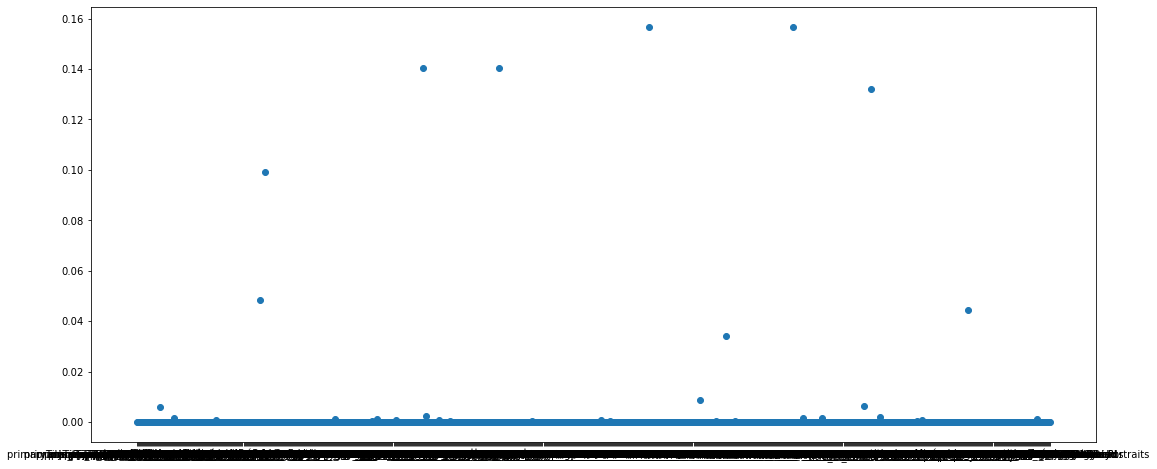

In [92]:
plt.figure(figsize=(18,8))
plt.scatter(x=MainData.columns, y=model.feature_importances_)

## Model 3- K N N 

In [93]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
 
# Loading data
MainData = load_iris()
 
# Create feature and target arrays
X = MainData.data
y = MainData.target
 
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
             X, y, test_size = 0.2, random_state=42)
 
knn = KNeighborsClassifier(n_neighbors=7)
 
knn.fit(X_train, y_train)
 
# Predict on dataset which model has not seen before
print(knn.predict(X_test))

[1 0 2 1 1 0 1 2 2 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


# Confusion Matrix

In [94]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [95]:
#Performance Evaluation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test, predictions))

print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
